# 8. This question involves the use of simple linear regression on the Auto data set. 
## (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:
* (i.) Is there a relationship between the predictor and the response?
* (ii.) How strong is the relationship between the predictor and the response?
* (iii.) Is the relationship between the predictor and the response positive or negative?
* (iv.) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

## (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.
## (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

__________________________________________________________________________________________________

# Before, we begin answering all the questions mentioned in the above dataset, It is very important to analyze the data, then analyze each column separately.

______________________________________________________________________________________________________________________________

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
auto_data = pd.read_csv('Auto.csv')

# First 5 Values in the Dataset

In [3]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
auto_data.shape

(397, 9)

* ### Shape allows us the understand the Number of Rows and Number of Columns our Data has.

In [5]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


* ### Here we have <i>mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin</i> as Quantitative Values.
* ### <i>Name</i> is a Qualitative Value we have.

# Checking for Missing Values

In [6]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

* Here, we can observe that horsepower has 5 missing Values.
* Let's get rid of the missing values by replacing it with a mean of Horspower.

In [7]:
auto_data['horsepower'] = auto_data['horsepower'].fillna(auto_data['horsepower'].mean())

In [8]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

* Now, we can notice that we don't have any missing values in data.

In [9]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.247388,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


* ### Here the describe() function gives us the descriptive statistics of our data.

# Numerical Analysis and Visualization
# 1. MPG
* First Let's Analyze the __mpg__ column

## Let's Plot pairplot for mpg(Gas Mileage) against other numeric variable such as cylinders,displacement,accleration,horsepower and weight.

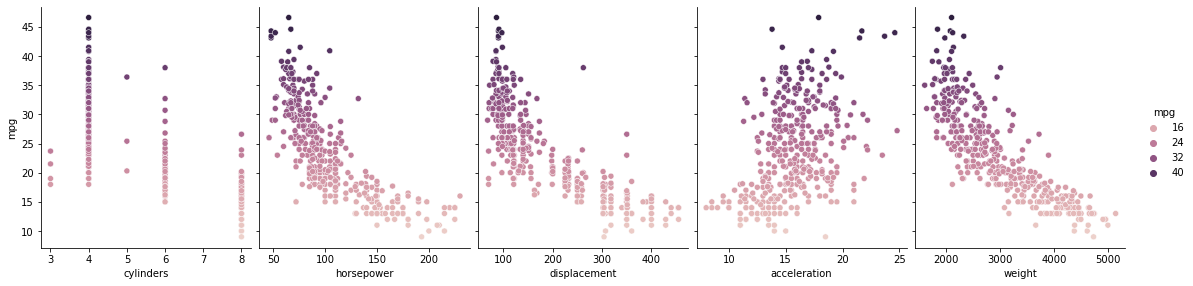

In [10]:
sns.pairplot(auto_data, x_vars=['cylinders','horsepower','displacement',
                         'acceleration', 'weight'], y_vars='mpg',height=4,aspect=0.8,kind='scatter',hue='mpg')
plt.show()

* In this question, We are trying to predict the values of __mpg__ and that is why we are plotting a pairplot.
* This pairplot helps understand the underlying relationship of variable __MPG(Gas Mileage)__ with respect to __Cylinders, Horsepower, Displacement, Acceleration, Weight__ .

In [11]:
auto_data['mpg'].describe()

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

* Here, we use the describe() function to look at count(Number of Values present in the dataset), mean, standard deviation, percentiles and Minimum and Maximum values.

* We can notice that, __mpg__ has a Mean of 23.515869 and Standard Deviation of 7.825804.

In [12]:
auto_data['mpg'].median()

23.0

* __mpg__ has a median of 23.0

## Visualize mpg using a boxplot

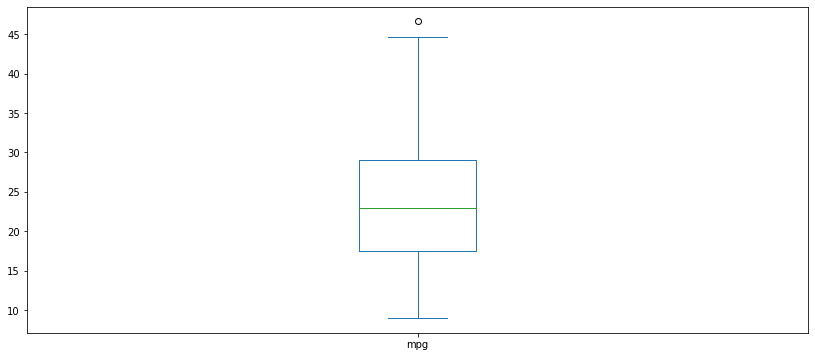

In [13]:
auto_data['mpg'].plot(kind='box', figsize=(14,6));

* Here we can notice that, we have a single outlier out of our Max Whisker.

## Density plot of mpg

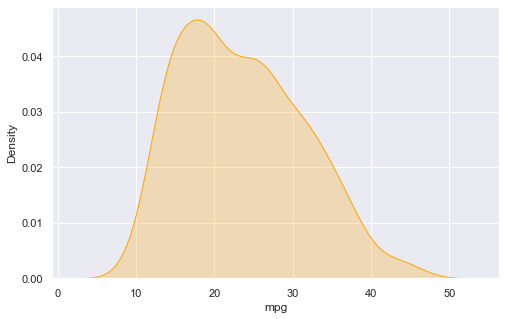

In [14]:
sns.set(rc={'figure.figsize':(8,5)})
sns.kdeplot(auto_data['mpg'],shade=True,color='orange');

In [15]:
auto_data['mpg'].max()

46.6

In [16]:
auto_data[auto_data['mpg']==46.6].value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  year  origin  name     
46.6  4          86.0          65.0        2110    17.9          80    3       mazda glc    1
dtype: int64

 * The Outlier which we are observing in the boxplot is a value of 46.6 and has only one occurrence.

# 2. Cylinders
* Now let's analyze the __cylinders__ column.

In [17]:
auto_data['cylinders'].describe()

count    397.000000
mean       5.458438
std        1.701577
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

* Here, we use the describe() function to look at count(Number of Values present in the dataset), mean, standard deviation, percentiles and Minimum and Maximum values.

In [18]:
auto_data['cylinders'].median()

4.0

* We can observe that 25% Standard Deviation or first Quartile value of __cylinders__ is equal to the value of median and also the maximum value 75% Standard Deviation or third quartile is __same__.

## Box plot for Cylinders column

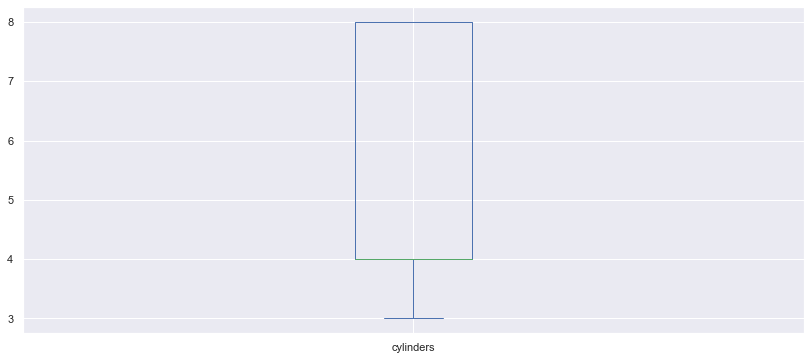

In [19]:
auto_data['cylinders'].plot(kind='box', figsize=(14,6));

* Here we can observe that no whisker is available at the maximum value, this happens when upper quartile is equal to the maximum value. Also, we can notice that median is shared with the lower quartile.

## Density plot of cylinders
* Here we try to plot a density plot of __cylinders__ with a median and mean line 

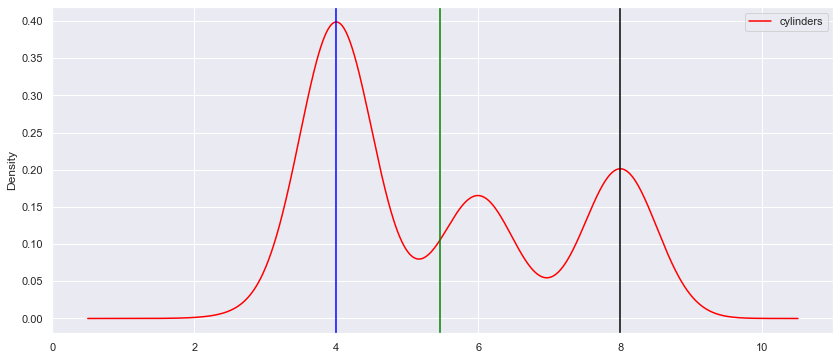

In [20]:
ax = auto_data['cylinders'].plot(kind='density',figsize=(14,6),color='red')
ax.axvline(auto_data['cylinders'].mean(), color='green')
ax.axvline(auto_data['cylinders'].median(), color='blue')
ax.axvline(auto_data['cylinders'].max(), color='black')
ax.legend()

### This plot explains much of the data we observed in our boxplot :
- Blue Line denotes the median which is shared with Quartile 1.
- Green Line denotes the mean of __cylinders__ column.
- Black line denotes the maximum value of a __cylinders__ column and we can also observe that it shared with the third quartile.

# 3. Displacement
- Let's understand the values of Displacement Column

In [21]:
auto_data['displacement'].describe()

count    397.000000
mean     193.532746
std      104.379583
min       68.000000
25%      104.000000
50%      146.000000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

* Here, we use the describe() function to look at count(Number of Values present in the dataset), mean, standard deviation, percentiles and Minimum and Maximum values.

In [22]:
auto_data['displacement'].median()

146.0

* Displacement has a median value of 146.

## Box plot for displacement column

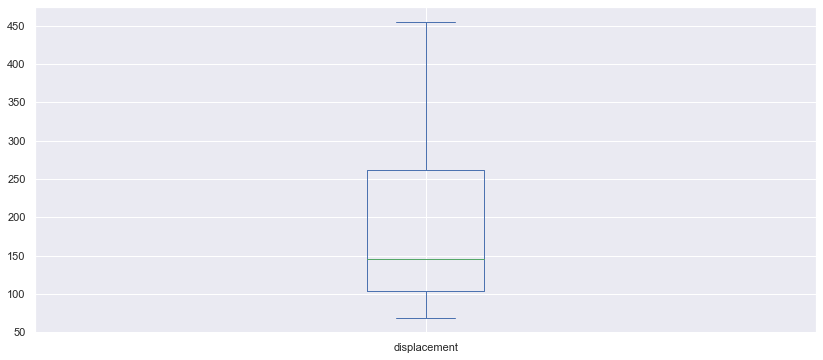

In [23]:
auto_data['displacement'].plot(kind='box',figsize=(14,6));

* Here we don't observe any outliers also the graphical values are similar to descriptive value.

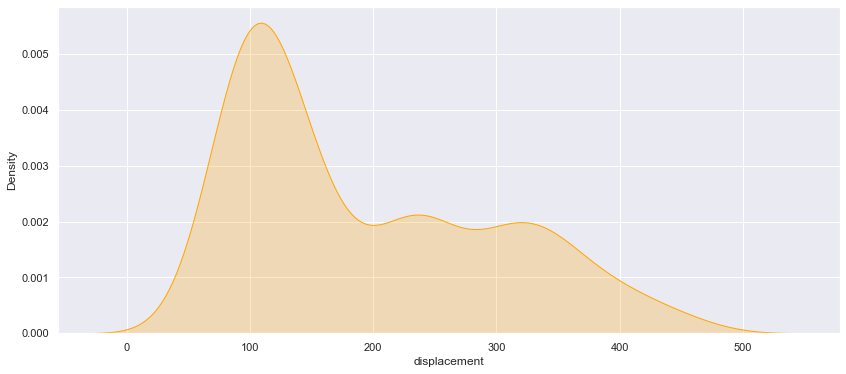

In [24]:
sns.set(rc={'figure.figsize':(14,6)})
sns.kdeplot(auto_data['displacement'],shade=True,color='orange');

# 4. Horsepower


In [25]:
auto_data['horsepower'].describe()

count    397.000000
mean     104.469388
std       38.247388
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

* Here, we use the describe() function to look at count(Number of Values present in the dataset), mean, standard deviation, percentiles and Minimum and Maximum values.

In [26]:
auto_data['horsepower'].median()

95.0

* Horsepower has a median of 95.

## Box plot for Horsepower column

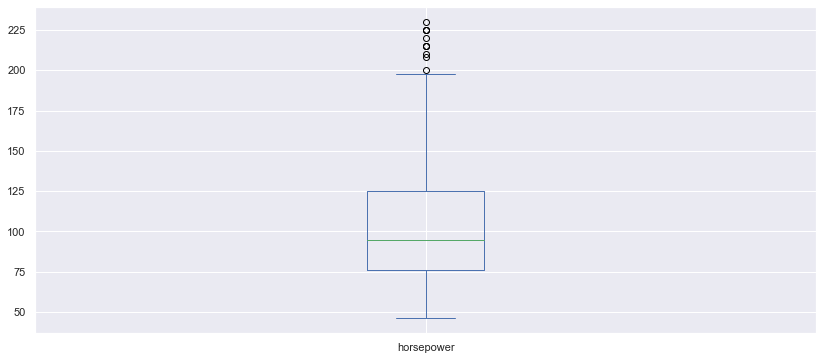

In [27]:
auto_data['horsepower'].plot(kind='box', figsize=(14,6));

* Here we can observe lots of OUTLIERS in the BoxPlot.

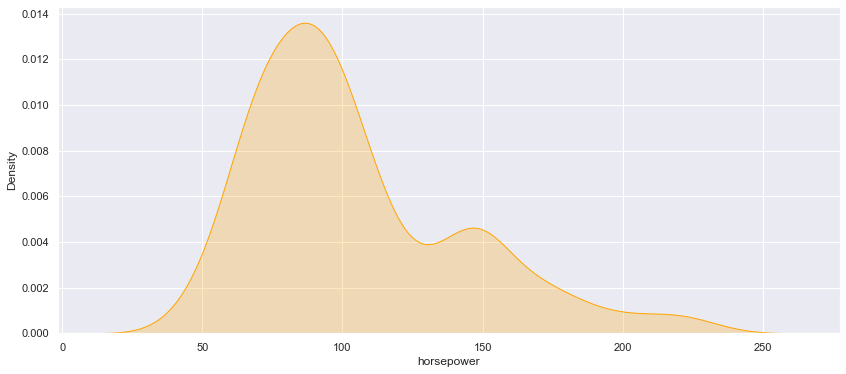

In [28]:
sns.set(rc={'figure.figsize':(14,6)})
sns.kdeplot(auto_data['horsepower'], shade=True, color='orange');

# 5. Weight

In [29]:
auto_data['weight'].describe()

count     397.000000
mean     2970.261965
std       847.904119
min      1613.000000
25%      2223.000000
50%      2800.000000
75%      3609.000000
max      5140.000000
Name: weight, dtype: float64

* Here, we use the describe() function to look at count(Number of Values present in the dataset), mean, standard deviation, percentiles and Minimum and Maximum values.

In [30]:
auto_data['weight'].median()

2800.0

* Weight Column has a median value of 2800.


## Box Plot for Weight column

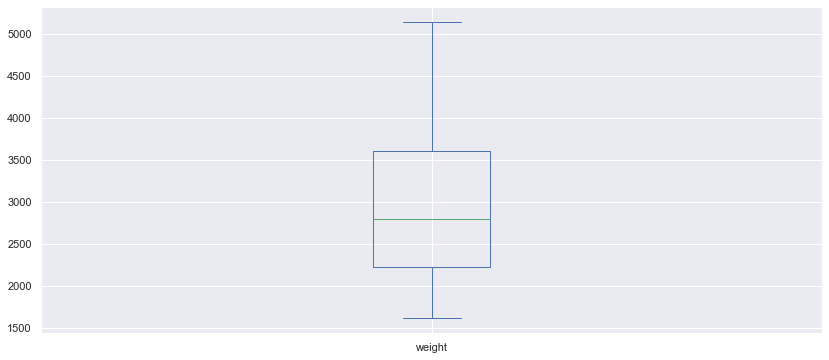

In [31]:
auto_data['weight'].plot(kind='box', figsize=(14,6));

## Density plot for Weight column

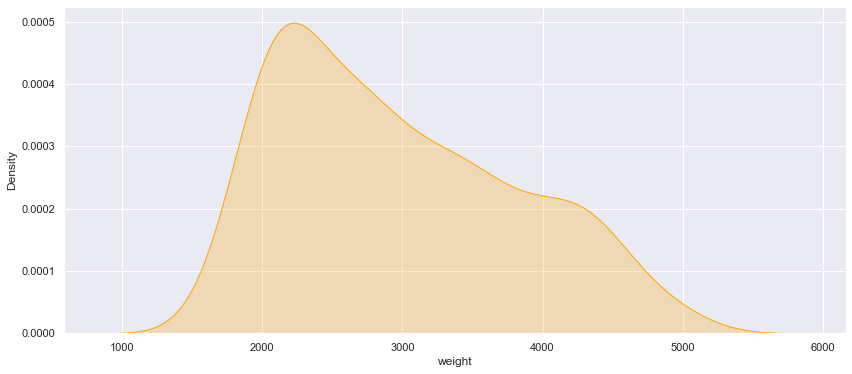

In [32]:
sns.set(rc={'figure.figsize':(14,6)})
sns.kdeplot(auto_data['weight'], shade=True, color='orange');

# 6. Acceleration

In [33]:
auto_data['acceleration'].describe()

count    397.000000
mean      15.555668
std        2.749995
min        8.000000
25%       13.800000
50%       15.500000
75%       17.100000
max       24.800000
Name: acceleration, dtype: float64

* The describe() function gives the detailed descriptive value about the count(Number of values in our data),mean, Standard deviation, percentiles and minimum and maximum values.

## Box plot for acceleration column

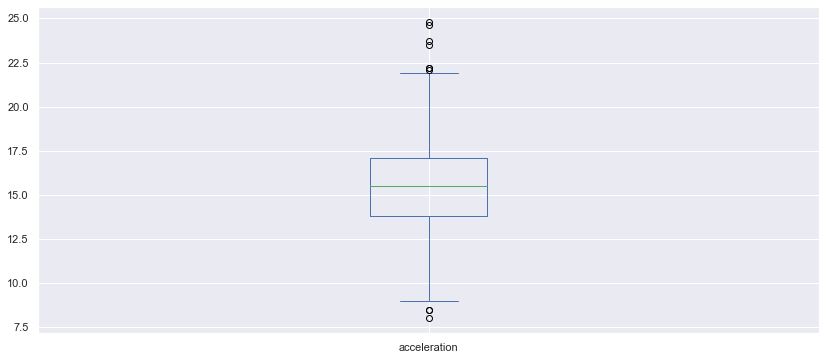

In [34]:
auto_data['acceleration'].plot(kind='box', figsize=(14,6));

* Here we can observe the __OUTLIERS__ out of the Upper Whisker and also there are __OUTLIERS__ present outside the Lower Whisker.

## Density plot for acceleration column 

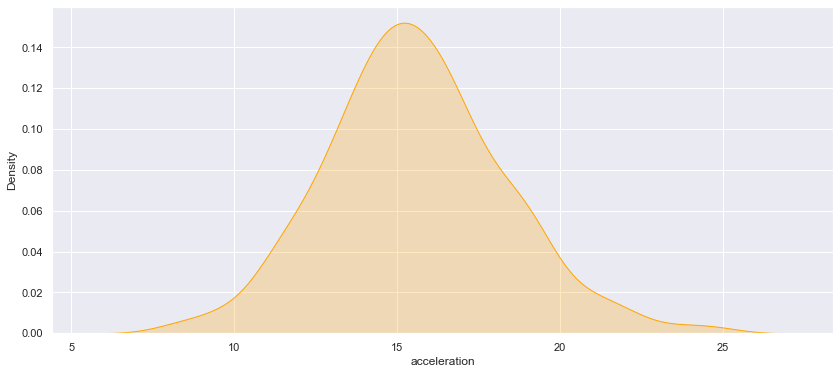

In [35]:
sns.set(rc={'figure.figsize':(14,6)})
sns.kdeplot(auto_data['acceleration'], shade=True, color='orange');

________________________________________________________________________________________________________________________________

# Question 8. (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:
## (i.) Is there a relationship between the predictor and the response?
## (ii.) How strong is the relationship between the predictor and the response?
## (iii.) Is the relationship between the predictor and the response positive or negative?
## (iv.) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?


________________________________________________________________________________________________________________________________

## Correlation between Variables
* The corr() function help us understand the correlation between the Quantitative Variables available to us.
* Now, the value 1 represents a High Correlation, and is generally observed between same column on the y-axis and x-axis.
### For Positive Values - It is positive Correlation. For Negative Values - It is Negative Correlation.
* If the value is between __0.90 - 1__ then the correlation is Very High and Strong.
* If the value is between __0.70 - 0.90__ then the correlation is High and Strong.
* If the value is between __0.50 - 0.70__ then the correlation is considered to be Medium.
* If the value is between __0.30 - 0.50__ then the correlation is Considered to be weak and Low.
* If the value is between __0 - 0.30__ then the correlation is considered to be Negligible or No Correlation.

In [36]:
auto_data.corr() #Correlation Coefficients

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962
weight,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000


## We know that the Response variable which is mpg and the Predictor variable is Horsepower. Let's Obsserve these values first.
* The __mpg__ and __horsepower__ has a correlatiom value of __-0.771441__ .
* We can notice that value is Negative, and lies between the range of __0.70-0.90__ . 
* Hence, We can conclude that __mpg__ and __horsepower__ has __Strong Negative Correlation__.

## The Strong Negative Correlation between mpg and horsepower will be very beneficial in predicting mpg while using horsepower variable.

## Heatmap for our given data

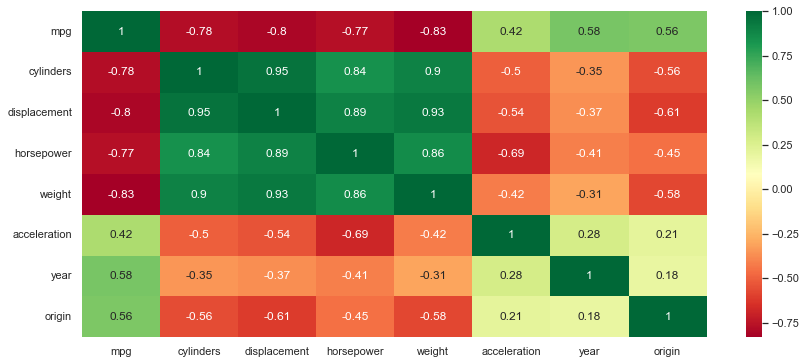

In [37]:
sns.heatmap(auto_data.corr(),cmap="RdYlGn",annot=True)
plt.show()

* In this above Heatmap, Red Color represents a strong negative Correlation and Green Color represents a Strong Positive Correlation.
* On the Basis of Heatmap, we can observe that __mpg__ has Strong Negative Correlation with __Cylinders, Displacement, Horsepower and Weight__.
* ALso, __mpg__ has a Medium Correlation with __year and origin__, which do not have much role to play in terms of making predictions.
* __mpg__ has low or weak correlation with __acceleration__

## Let's Plot a Scatter Plot between mpg and horsepower to understand it better.

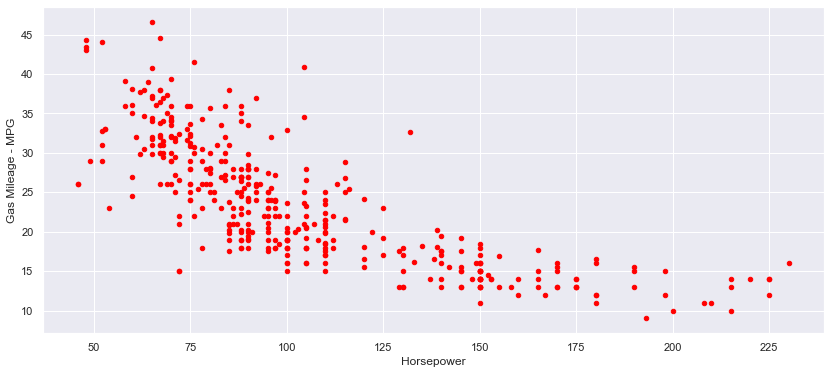

In [38]:
auto_data.plot(kind='scatter', x='horsepower', y='mpg', color='red')
plt.xlabel('Horsepower')
plt.ylabel('Gas Mileage - MPG')
plt.show()

## As we can notice from our Scatter Plot that mpg and Horsepower has a Strong Negative Correlation and the data looks scattered. So, assuming the Scatter Plot there may be a situation where we have outliers and also we need to calculate our model with reference to Residuals. Let's keep residuals part aside and try to build a model first.

## Let's also plot a Box Plot of both mpg and horsepower, this will allow us to observe outliers and value range of both mpg and horsepower.

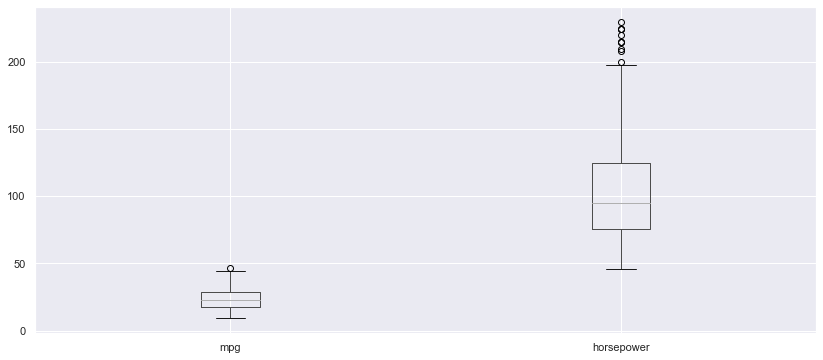

In [39]:
boxplot = auto_data.boxplot(column=['mpg','horsepower'])

## Correlation Heatmap Between mpg and Horsepower

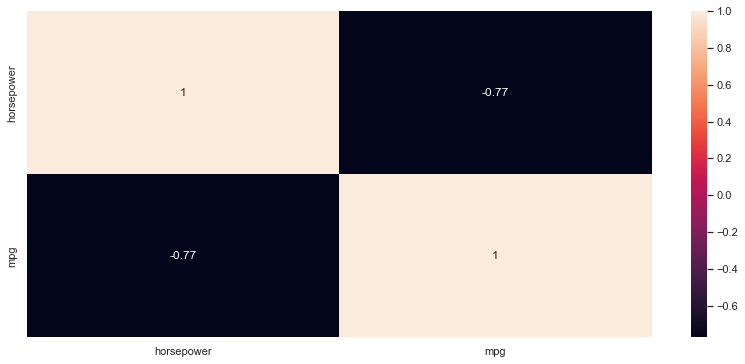

In [40]:
viz = sns.heatmap(auto_data[['horsepower','mpg']].corr(), annot=True)

## The correlation value is between -1.0 and 1.0. The sign indicates whether it is positive or negative correlation.

## We can see in the above figure that horsepower and mpg have a negative correlation value -0.77.

# Explaination and Calculations

# As the question demands us to perform Simple Linear Regression where we consider <i>mpg</i> as the response variable and <i>horsepower</i> as the predictor variable.

## Before, we jump into that, let's try to observe how all the variables are correlated and then we can begin with our further analysis.

## In Simple Linear Regression, we build a model where we take a variable known as predictor variable(X) which we use to predict a variable known as Response Variable (y). In Simple Linear Regression our goal is to define a function where y = f(x). 

## Simple Linear Regression helps us to predict the response variable on the basis of predictor variable. For example, If x = (x1,x2,x3.....xn) and y = (y1,y2,y3....yn) then our goal is predict a function where Yi = f(Xi) where i = 1,2,3,....n.

## In our Data, Predictor Variable is Horsepower and Response Variable is mpg.

_______________________________________________________________________________

## Equation of Simple Linear Regression :

# y = c + mX

## In our Case :

# y = c + m * horsepower

* Here, __m__ is known as the Slope. 
* __c__ is the y-intercept value (i.e) The value of y when x=0.

__________________________________________________________________________

## The Steps Involved in Simple Linear Regression
* Create X and y
* Create Train and Test set
* Train a Model
* Evaluate the model

## Here X represents our Predictor Variable which is <i>Horsepower</i> and y represents our response variable which is <i>mpg</i>.

* ## Creating X and y

In [41]:
y = pd.DataFrame(auto_data['mpg'])        
X = pd.DataFrame(auto_data['horsepower']) 

* ## Create Train and Test set
We need to __Create Train Set and Test set__ of our data, where we will use __Train Set to train our Model__ and then we will take __Test Set and apply our Model on it__. We will divide the __Train Set and Test Set__ in the ratio of __8:2__ respectively.

## Let's Split the data using <i>train_test_split</i> from <i>sklearn.model_selection</i> Library.

In [42]:
#Divinding the variables for Training and Testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=19)

* Here we have used __sklearn.model_selection Library__ and split our Data using __train_test_split.__ 
* Now we have __X_train, X_test, y_train, y_test__
* If we notice then there is hyperparameter called __random_state__ in __train_test_split()__ function, this random_state parameters __controlls the shuffling process.__
* __Note:__ With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 , we get the same train and test sets across different executions. <i>{Source : Google.com}</i>

## Let's look at our Training Dataset

In [43]:
X_train

,horsepower
76,112.000000
292,150.000000
310,60.000000
121,150.000000
390,84.000000
...,...
19,46.000000
354,104.469388
245,66.000000
110,94.000000


In [44]:
y_train

,mpg
76,18.0
292,18.5
310,38.1
121,15.0
390,36.0
...,...
19,26.0
354,34.5
245,36.1
110,22.0


* ## Let's Train our Simple Linear Regression Model Now 
* ## There are two ways of Training a Simple Linear Regression Model 
      (1.) Using sklearn Library
      (2.) Using statsmodel Library
 
* ## We will be using statsmodel Library because Statsmodel library provides summary of Linear Regression Model in much more detailed. We can easily access p-value, R-squared value and F-statistics using a statsmodel Library which becomes a critical task while using a sklearn library.

## Let's import statsmodels.api from statmodels package

In [45]:
import statsmodels.api as sm

## Now we add a constant to our X_train.
### The reason we add a constant to our Data is to ensure our model is unbiased. 

In [46]:
X_train_const = sm.add_constant(X_train)

In [47]:
X_train_const

,const,horsepower
76,1.0,112.000000
292,1.0,150.000000
310,1.0,60.000000
121,1.0,150.000000
390,1.0,84.000000
...,...,...
19,1.0,46.000000
354,1.0,104.469388
245,1.0,66.000000
110,1.0,94.000000


## Now, let's fit our regression line using OLS(Ordinary Least Square) method present in the statsmodel.

In [48]:
model = sm.OLS(y_train,X_train_const).fit()

## Let's print the parameter which will give us the value of Intercept and Slope

In [49]:
model.params

const         40.821416
horsepower    -0.163671
dtype: float64

## Now, the main reason why we used the statsmodel for our regression fit:
- Statsmodels provide us with the detailed descriptive analytics about our Model. Let's hava a look at it.
- By using statsmodels, we can easily calculate R-squared Value, p-Value and F-statistics for our Model.

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     450.2
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           1.14e-62
Time:                        20:24:13   Log-Likelihood:                -966.01
No. Observations:                 317   AIC:                             1936.
Df Residuals:                     315   BIC:                             1944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.8214      0.848     48.143      0.000      39.153      42.490
horsepower    -0.1637      0.008    -21.217      0.000      -0.179      -0.148
==============================================================================
Omnibus:                       17.173   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.472
Skew:                           0.548   Prob(JB):                     9.75e-05
Kurtosis:                       3.444   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## We are concerned with the value of coeffcients, p-Value, R-Squared value.

## 1. p-value - In linear Regression, the Null Hypothesis means there is no relation between the dependent and Independent variables. P-Value is used in Hypothesis testing to support or reject Null hypotheses. p-value acts as evidence for our Null Hypothesis. Smaller the Value, the Stronger the evidence to reject the Null Hypothesis. If the p-value is less than 0.05, reject the Null Hypothesis, and If the p-value is greater than 0.05 do not reject the Null Hypothesis.

## 2. R-squared Value : R-squared Value helps us understand, how much of the difference in the outcome can be explained with the help of our model. 
- For example: If R-squared value is 0.90 then we can state that 90% of variance in y can be explained using x.
- The closer the value of R-squared towards 1, the more accurate model we have.

## R-Squared value is 0.588 which means 58.8% of the mpg variance can be explained by the horsepower column.
## p-Value is negligible to 0 which means we can reject the Null Hypotheses and consider that Model fit is significant.

## The Linear Model or Straight Line Equation which we get after Fitting our Data and above values is

# y = 40.8214 - 0.1636 * X

## Let's Visualize the Regression Line

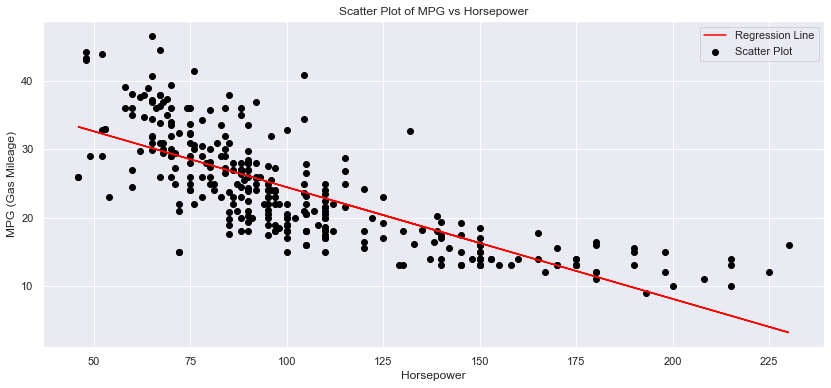

In [51]:
plt.scatter(X_train,y_train,color='black',label='Scatter Plot')
plt.plot(X_train, 40.8214 - 0.1636*X_train, color='red', label="Regression Line")
plt.ylabel("MPG (Gas Mileage)")
plt.xlabel("Horsepower")
plt.title("Scatter Plot of MPG vs Horsepower")
plt.legend()
plt.show()


## Now, before evaluating model on Test Data, we need to perform Residual Analysis.
## As, we can notice that the Data Points do not lie exactly on the Straight Line of our Data. We will need to deal with Residuals.

## Residual Analysis

## There are two things which we should always remeber while dealing with Residuals in Linear Regression. First, Residuals should follow a pattern of Normal Distribution and Secondly, Residuals should not follow any specific pattern with the Predictor Variable.


# Error(Residuals) = Actual y Value - y Predicted Value

## Here, we will try to predict <i>y_train</i> value on the basis of our Training Data <i>X_train</i>.
## Then we will calculate error(residuals) using our "actual y Value" and "y predicted value"

In [52]:
# predicting y_value using training data of X
y_train_pred = model.predict(X_train_const)
y_train_pred

76     22.490214
292    16.270699
310    31.001129
121    16.270699
390    27.073014
         ...    
19     33.292529
354    23.722760
245    30.019100
110    25.436300
93     16.270699
Length: 317, dtype: float64

In [53]:
y_train

,mpg
76,18.0
292,18.5
310,38.1
121,15.0
390,36.0
...,...
19,26.0
354,34.5
245,36.1
110,22.0


In [54]:
print(y_train.shape)
print(y_train_pred.shape)

(317, 1)
(317,)


## As you can notice there is a difference between the shape of y_train and y_train_pred. 

## This wouldn't allow us to subtract y_train_pred from y_train and calculate residuals.

## Let's fix that first


In [55]:
y_train_pred = y_train_pred.to_frame('mpg')

In [56]:
y_train_pred.shape

(317, 1)

## Residuals from the y_train data and predicted y_data

In [57]:
res = (y_train - y_train_pred)

In [58]:
res

,mpg
76,-4.490214
292,2.229301
310,7.098871
121,-1.270699
390,8.926986
...,...
19,-7.292529
354,10.777240
245,6.080900
110,-3.436300


## The assumptions we usually make in Linear Regression is that Error Values are Normally Distributed.

## So, let's plot a histogram to observe the residuals and see whether it looks like Normal Distribbution or Not

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


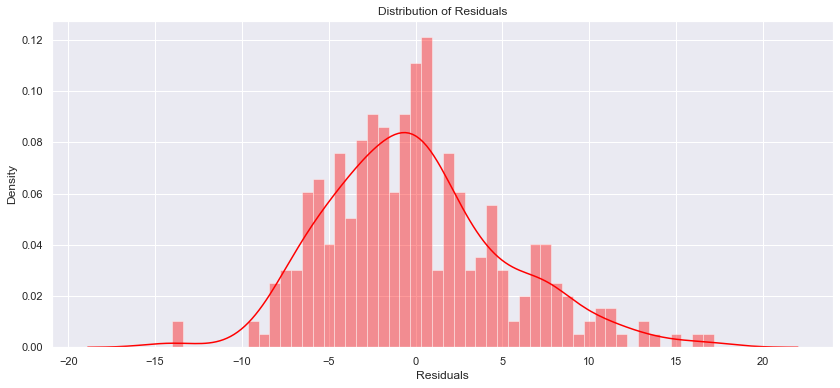

In [59]:
sns.distplot(res,bins=50,color='red')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

## As we can observe that Residuals are following the Normal Distribution Graph.

## Now lets plot our train data and residuals to see if they are following any specific pattern.


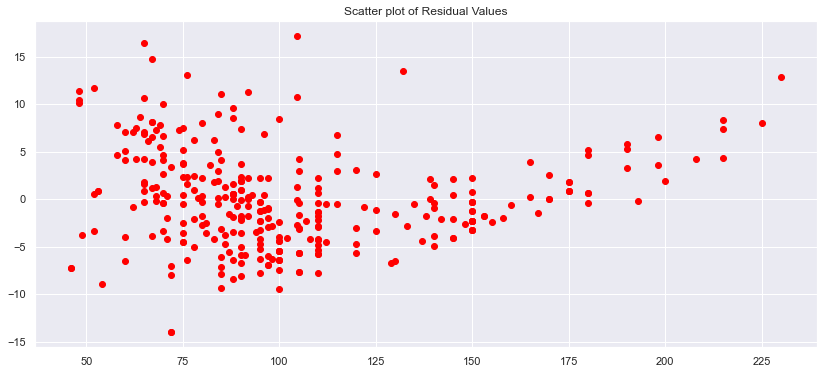

In [60]:
plt.scatter(X_train,res,color='red')
plt.title("Scatter plot of Residual Values")
plt.show()

## As we can observe that, Residuals follow a Normal Distribution and do not follow any specific pattern in the Scatter Plot.
## We can use Linear Regression model we have build to evaluate Test Data

In [61]:
X_test_const = sm.add_constant(X_test)


## Here we add constant to X_test so that we can predict our y_test

In [62]:
y_test_pred = model.predict(X_test_const)
y_test_pred

206    29.037072
146    28.546057
297    28.218714
289    15.452342
232    16.434370
         ...    
60     26.090986
64     16.270699
293    29.200743
145    30.837457
176    26.090986
Length: 80, dtype: float64

## Comparing the R^2 value of both Train and Test Data

In [63]:
from sklearn.metrics import r2_score
print(round(r2_score(y_train,y_train_pred),3))
print(round(r2_score(y_test,y_test_pred),3))

0.588
0.597


* Here we are rounding up our values to 3 decimal places

## R-Squared value is 0.588 of Train Data which means 58.8% of the mpg variance can be explained by the horsepower column using this line on the Training Data.
## R-Squared value is 0.597 of Test Data which means 59.7% of the mpg variance can be explained by the horsepower column using this line on the Training Data.

# Let's Visualize the line on test data

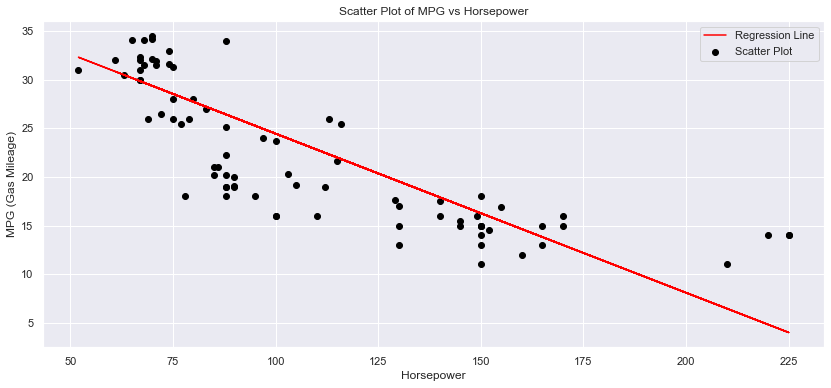

In [64]:
plt.scatter(X_test,y_test,color='black',label='Scatter Plot')
plt.plot(X_test,y_test_pred,color='red', label="Regression Line")
plt.ylabel("MPG (Gas Mileage)")
plt.xlabel("Horsepower")
plt.title("Scatter Plot of MPG vs Horsepower")
plt.legend()
plt.show()

## As our R-squared scores tell us our model is able to predict right values approximately till 60% and that's low.
## We can conclude that our model is inaccurate while performing analysis on the Far Lower values and Far upper values, It somewhat provides precise values in the medium range.

_______________________________________________________________________________

## <i> 8.a.(i.) Is there a relationship between the predictor and the response?</i>


## Answer(i) : Yes. There is a relationship between predictor and response which is horsepower and mpg respective. 
## We can say that on the basis of correlation coefficient , p-Value and also the scattter plot between mpg and horsepower. 
## The Correlation coefficient has a value of -0.771441 between horsepower and mpg. 
## The p-Value is negligible to 0 which rejects the Null Hypotheses.
## Also, when we observe the scattter plot we can see a Negative Correlation between mpg and horsepower

_______________________________________________________________________

## 8.a.(ii.) How strong is the relationship between the predictor and the response?

## Answer (ii) The relationship between horsepower and mpg looks strong when try to take Correlation Coeffcients and scatter plot into the consideration. 

## But as we found out on the basis of Linear Regression Model have a R-squared value of 0.597 which means we can predict 59.7% of mpg variance on the basis of horsepower column.

______________________________________________________________________________

## 8.a.(iii.) Is the relationship between the predictor and the response positive or negative?

## Answer(iii) The relationship between predictor (horsepower) and the response (mpg) is Negative. We can notice it when we observe Correlation Coeffcients which gives the value in - (minus) sign also we can authenticate that by observing a scatter plot of mpg and horsepower. 

_______________________________________________________________________________

## 8.a.(iv.) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [65]:
horsepower_new = [1,98]
mpg_predict = model.predict(horsepower_new)

In [66]:
mpg_predict

array([24.78161409])

## 95% Confidence Interval is a range of values which predicts that Between this range lies the True mean of the population.

## Prediction Interval tells us the Range of Values that target can take for a given record. Prediction Interval always has a  wider range than Confidence Interval

In [67]:
model.predict(horsepower_new)

array([24.78161409])

In [68]:
intervals = model.get_prediction(horsepower_new)
intervals.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.781614,0.290153,24.210732,25.352496,14.707512,34.855716


## Here we can observe the values of Confidence Interval and Prediction Interval for the given Value of Horsepower which is 98

## The <i>mean_ci_lower</i> denotes that Lower Confidence Interval and <i>mean_ci_upper</i> denotes the Upper Confidence Interval with a value of 24.210 and 25.352 respectively.

## The <i>obs_ci_lower</i> denotes that Lower Prediction Interval and <i>obs_ci_upper</i> denotes the Upper Prediction Interval with a value of 14.707 and 34.855 respectively.
 

___________________________________________________________________________

## Note : One thing to remember in this values are that the Confidence Interval is usually applied on the population and Prediction Interval are applied on the specific record.

## If we wish to find confidence Interval for a specific data, we can achieve that using a Scipy.Stats Library.

In [69]:
from scipy.stats import sem, t

In [70]:
t.interval(0.95, len(y_train) - 1 , loc=y_train.mean(), scale=sem(y_train))

(array([23.01432923]), array([24.77242155]))

* len(y_test) - 1 = Degree of Freedom (Degree of Freedom is nothing but sample size minus 1)
* loc is Location parameter where we are passing our mean.
* 0.95 is our Confidence Interval.
* sem(y_test) = Standard error of Mean in y_test 
* Scale is a Scale Parameter

# 8 (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

## On Train Data

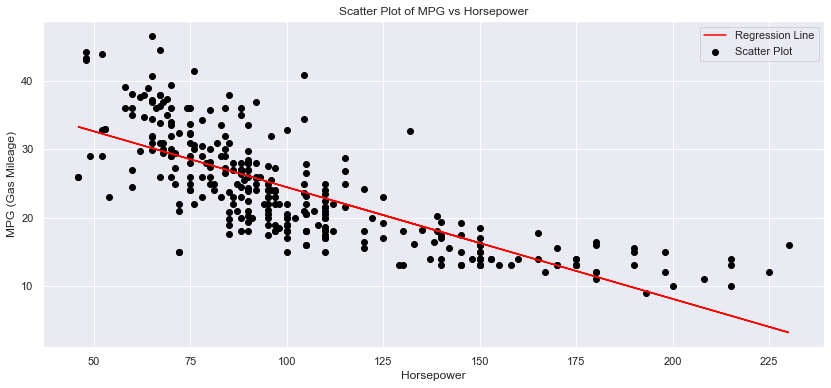

In [71]:
plt.scatter(X_train,y_train,color='black',label='Scatter Plot')
plt.plot(X_train, 40.8214 - 0.1636*X_train, color='red', label="Regression Line")
plt.ylabel("MPG (Gas Mileage)")
plt.xlabel("Horsepower")
plt.title("Scatter Plot of MPG vs Horsepower")
plt.legend()
plt.show()

## On Test Data

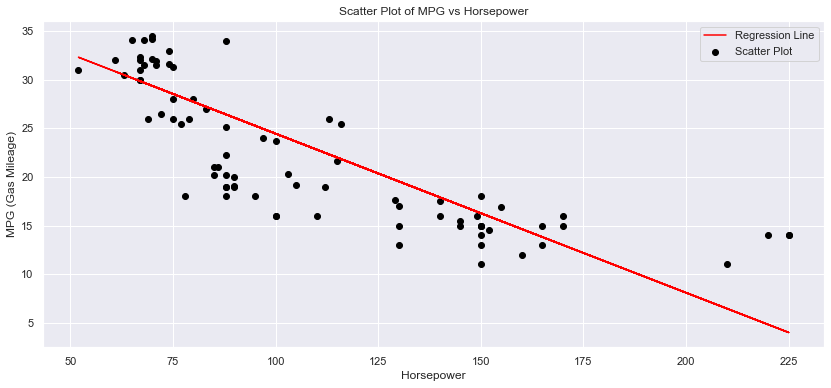

In [72]:
plt.scatter(X_test,y_test,color='black',label='Scatter Plot')
plt.plot(X_test,y_test_pred,color='red', label="Regression Line")
plt.ylabel("MPG (Gas Mileage)")
plt.xlabel("Horsepower")
plt.title("Scatter Plot of MPG vs Horsepower")
plt.legend()
plt.show()

# 8 (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

In [73]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [74]:
df_train = pd.concat([X_train,y_train], axis=1)

In [75]:
res = df_train.copy()

In [76]:
res['resid'] = model.resid

In [77]:
res['fitted_values'] = model.fittedvalues

In [78]:
res['resid_std'] = model.resid_pearson

In [79]:
res['leverage'] = model.get_influence().hat_matrix_diag

In [80]:
res

,horsepower,mpg,resid,fitted_values,resid_std,leverage
76,112.000000,18.0,-4.490214,22.490214,-0.878373,0.003322
292,150.000000,18.5,2.229301,16.270699,0.436095,0.008094
310,60.000000,38.1,7.098871,31.001129,1.388677,0.007449
121,150.000000,15.0,-1.270699,16.270699,-0.248573,0.008094
390,84.000000,36.0,8.926986,27.073014,1.746292,0.004014
...,...,...,...,...,...,...
19,46.000000,26.0,-7.292529,33.292529,-1.426561,0.010664
354,104.469388,34.5,10.777240,23.722760,2.108238,0.003157
245,66.000000,36.1,6.080900,30.019100,1.189542,0.006344
110,94.000000,22.0,-3.436300,25.436300,-0.672207,0.003357


## There are 4 types of Diagnostic plots:
- 1. Residual vs Fitted
- 2. Normal Q-Q
- 3. Scale-Location
- 4. Residual vs Leverage

## 1. Residual vs Fitted values
__This Plot tells us about the Non Linear pattern between Residuals and Fitted values. If we see a horizontal line without any distinct patterns, we can conclude that our model does not follows any kind of Non Linear Relationship.__
[Source](https://data.library.virginia.edu/diagnostic-plots/)

In [81]:
res['fitted_values']

76     22.490214
292    16.270699
310    31.001129
121    16.270699
390    27.073014
         ...    
19     33.292529
354    23.722760
245    30.019100
110    25.436300
93     16.270699
Name: fitted_values, Length: 317, dtype: float64

Text(0.5, 1.0, 'Residuals vs Fitted')

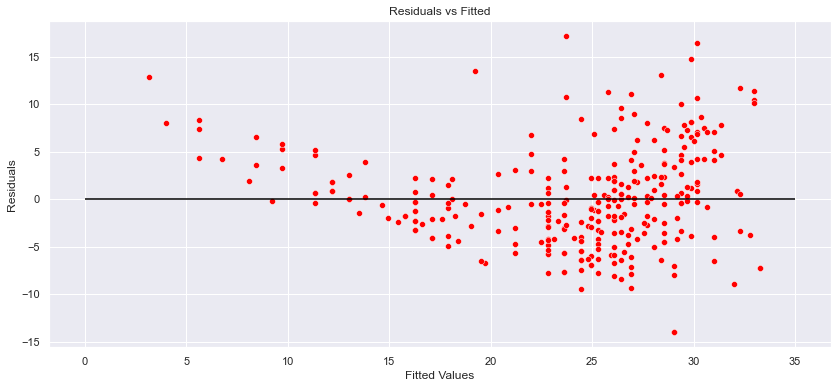

In [82]:
sns.scatterplot(x=res['fitted_values'],y=res['resid'],color='red')
plt.hlines(y=0,xmin=0,xmax=35,color='black')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")

__If we look at the plot closely, we can see that the data points are clustered after 22 till 30 on the x-axis and get wider after that.__ 

## 2. Normal Q-Q
__This plot helps us understand whether the residuals are normally distributed or not. It's considered good if residuals are lined well on the straight line. Point to remember : It wouldn't be exact Straight Line.__
[Source](https://data.library.virginia.edu/diagnostic-plots/)

In [83]:
import pingouin as pg

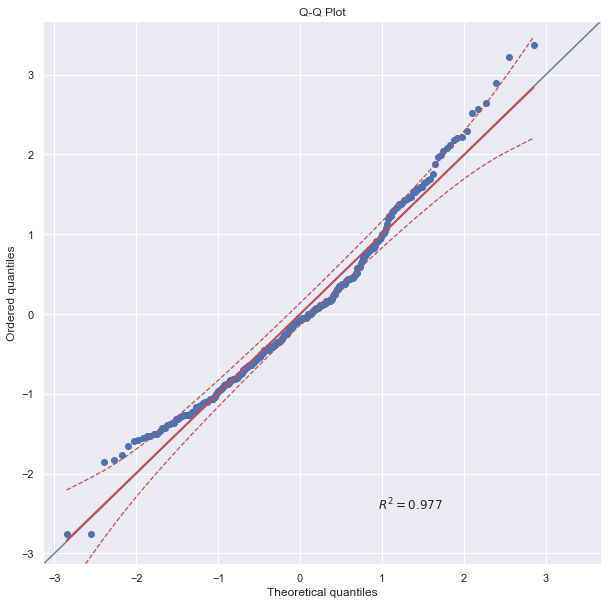

In [84]:
pg.qqplot(res['resid'],dist='norm',figsize=(10,10));

__If we notice this qqplot, then we can observe that there are few values which are way off like in bottom left region and also few data point in top right region. Apart from that residuals look nomrally distributed mostly.__

## 3. Scale-Location
__This plot is known as Spread Location plot. It gives an idea whether residuals are equally spreaded along the range of predictor. This plot helps us check the assumption of equal variance which is also knows HETEROSCEDASTICITY.__[Source](https://data.library.virginia.edu/diagnostic-plots/)

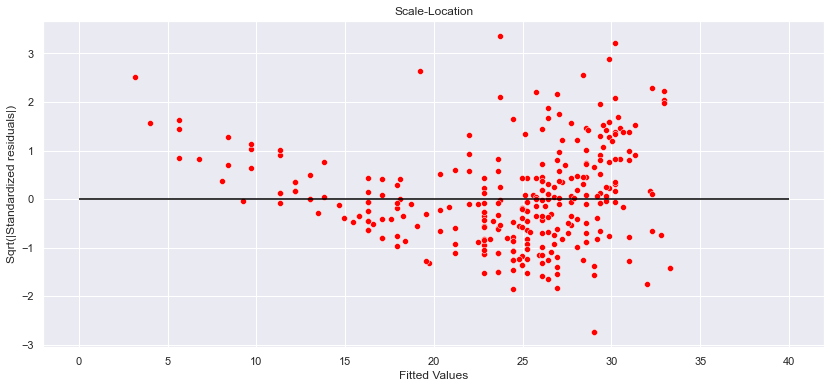

In [85]:
sns.scatterplot(x=res['fitted_values'],y=res['resid_std'],color='red')
plt.hlines(y=0,xmin=0,xmax=40,color='black')
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt(|Standardized residuals|)")
plt.title("Scale-Location")
plt.show()

__We can observe that if we move along the X-axis then the spread of residuals gets wider and wider. The data points do not look uniformly distributed and can be a sign of Homoscedasticity.__

## 4. Residuals vs Leverage
__This plot helps us find influential cases if any exist. This plot donot tell much about patterns but only about cases which can crucial in our model.__

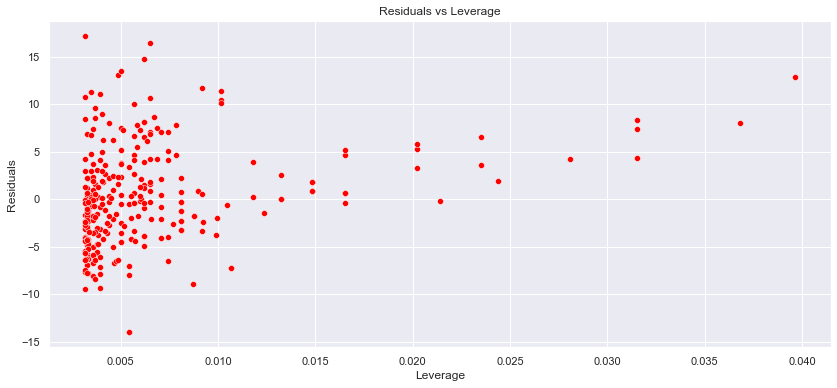

In [86]:
sns.scatterplot(x=res['leverage'],y=res['resid'],color='red')
plt.title("Residuals vs Leverage")
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.show()

__We can observe that some points are behaving odd and have been spread over a X-axis.__